# Lesson 3: The Data Analysis Process

## Reading CSV Files

In [1]:
import numpy as np
import pandas as pd

df_powerplant = pd.read_csv('../resources/lesson3/powerplant_data.csv')
df_powerplant.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


Set column names for the loaded CSV.

In [2]:
class ColPowerPlant:
    """ Column names for the power plant data set. """
    abm_t = "Ambient Temperature (AT)"
    ex_vac = "Exhaust Vacuum (V)"
    amb_p = "Ambient Pressure (AP)"
    rel_humid = "Relative Humidity (RH)"
    el_output = "Electrical Energy Output (PE)"

col_names=[ColPowerPlant.abm_t, ColPowerPlant.ex_vac, ColPowerPlant.amb_p,
           ColPowerPlant.rel_humid, ColPowerPlant.el_output]
df_powerplant = pd.read_csv('../resources/lesson3/powerplant_data.csv', names=col_names, header=0)
df_powerplant.head()

,Ambient Temperature (AT),Exhaust Vacuum (V),Ambient Pressure (AP),Relative Humidity (RH),Electrical Energy Output (PE)
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


## Writing CSV Files

In [3]:
powerplant_filepath_edited = '../output/powerplant_data_edited.csv'
df_powerplant.to_csv(powerplant_filepath_edited)

No we read the saved CSV file.

In [4]:
df_powerplant_edited = pd.read_csv(powerplant_filepath_edited)
df_powerplant_edited.head()

,Unnamed: 0,Ambient Temperature (AT),Exhaust Vacuum (V),Ambient Pressure (AP),Relative Humidity (RH),Electrical Energy Output (PE)
0,0,8.34,40.77,1010.84,90.01,480.48
1,1,23.64,58.49,1011.40,74.20,445.75
2,2,29.74,56.90,1007.15,41.91,438.76
3,3,19.07,49.69,1007.22,76.79,453.09
4,4,11.80,40.66,1017.13,97.20,464.43


The written file has a new column `Unnamed: 0` containing the data frame index.
We can avoid saving in the `to_csv` call with `index=False`.

In [5]:
df_powerplant.to_csv(powerplant_filepath_edited, index=False)
df_powerplant_edited = pd.read_csv(powerplant_filepath_edited)
df_powerplant_edited.head()

,Ambient Temperature (AT),Exhaust Vacuum (V),Ambient Pressure (AP),Relative Humidity (RH),Electrical Energy Output (PE)
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


We now analyze a subset of the 1994 census data provided in the Udacity course.

An explanation of the columns can be found
[here](https://archive.ics.uci.edu/ml/datasets/Census+Income)
or
[here](http://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/048.pdf).

In [6]:
df_census = pd.read_csv('../resources/lesson3/census_income_data.csv')
df_census.head()
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We use pre-defined column names.

In [7]:
class Col:
    """ Column names for the census data set. """
    age = "age"
    workclass = "workclass"
    fnlwgt = "fnlwgt"
    education = "education"
    education_num = "education-num"
    marital_status = "marital-status"
    occupation = "occupation"
    relationship = "relationship"
    race = "race"
    sex = "sex"
    capital_gain = "capital-gain"
    capital_loss = "capital-loss"
    hours_per_week = "hours-per-week"
    native_country = "native-country"
    income = "income"

## Assessing and building intuition

In [8]:
df = df_census
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


First 10 rows

In [9]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Last 2 rows

In [10]:
df.tail(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


Dimensions of the data frame

In [11]:
df.shape

(32561, 15)

Data types in the columns

In [12]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

The type of some columns is shown as `object`, yet they can contain more specific data types.
Here, the `workclass` column has `object` as type, yet it contains `str` values.

In [13]:
df[Col.workclass].dtype

dtype('O')

In [14]:
type(df[Col.workclass][0])

str

Info on the data frame

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Number of unique values in each column

In [16]:
df.nunique()

age                  73
workclass             8
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       41
income                2
dtype: int64

Descriptive statistics on the data frame

In [17]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Indexing and Selecting Data in Pandas

Access data frame column numbers and names

In [18]:
for i, v in enumerate(df.columns):
    print(i, v)

0 age
1 workclass
2 fnlwgt
3 education
4 education-num
5 marital-status
6 occupation
7 relationship
8 race
9 sex
10 capital-gain
11 capital-loss
12 hours-per-week
13 native-country
14 income


Select column range by names

In [19]:
df.loc[:, Col.education:Col.occupation].head()

,education,education-num,marital-status,occupation
0,Bachelors,13,Never-married,Adm-clerical
1,Bachelors,13,Married-civ-spouse,Exec-managerial
2,HS-grad,9,Divorced,Handlers-cleaners
3,11th,7,Married-civ-spouse,Handlers-cleaners
4,Bachelors,13,Married-civ-spouse,Prof-specialty


Select column range by numbers

In [20]:
df.iloc[:, 3:8].head()

,education,education-num,marital-status,occupation,relationship
0,Bachelors,13,Never-married,Adm-clerical,Not-in-family
1,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband
2,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family
3,11th,7,Married-civ-spouse,Handlers-cleaners,Husband
4,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife


Select a subset of columns and save it to a CSV file.

In [21]:
census_income_work_edu_df = df[[Col.workclass, Col.education, Col.education_num]]

census_income_work_edu_filepath = '../output/census_income_work_edu.csv'
census_income_work_edu_df.to_csv(census_income_work_edu_filepath, index=False)

pd.read_csv(census_income_work_edu_filepath).head()

,workclass,education,education-num
0,State-gov,Bachelors,13
1,Self-emp-not-inc,Bachelors,13
2,Private,HS-grad,9
3,Private,11th,7
4,Private,Bachelors,13


Select multiple column ranges using `np.r_`.

In [22]:
df.iloc[:, np.r_[1:3, 10:15]].head()

,workclass,fnlwgt,capital-gain,capital-loss,hours-per-week,native-country,income
0,State-gov,77516,2174,0,40,United-States,<=50K
1,Self-emp-not-inc,83311,0,0,13,United-States,<=50K
2,Private,215646,0,0,40,United-States,<=50K
3,Private,234721,0,0,40,United-States,<=50K
4,Private,338409,0,0,40,Cuba,<=50K


## Cleaning data

In [23]:
df_product_view_data = pd.read_csv('../resources/lesson3/product_view_data.csv')
df = df_product_view_data
df

,user_id,product_id,liked,view_duration,source,timestamp
0,3987,997021,True,1.048242,web,2017-09-23 00:18:29.056895
1,6300,865003,True,1.688173,web,2017-09-21 02:20:22.022096
2,6451,712951,False,NaN,mobile,2017-09-07 11:57:50.044683
3,7782,283235,True,0.194162,mobile,2017-09-17 03:48:20.019677
4,7782,283235,True,0.194162,mobile,2017-09-17 03:48:20.019677
5,5700,587019,False,0.493194,web,2017-09-07 00:25:07.019097
6,3400,505123,True,NaN,web,2017-09-07 13:53:21.008403
7,8403,459916,False,0.675041,mobile,2017-09-25 21:54:00.028323
8,8965,943363,False,NaN,web,2017-09-17 15:12:21.059489
9,9693,787546,True,0.101743,web,2017-09-26 12:34:46.012559


Fill missing values with mean values.

In [24]:
view_duration_mean = df['view_duration'].mean()
df['view_duration'].fillna(view_duration_mean, inplace=True)

Now, there are no missing values.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        11 non-null     int64  
 1   product_id     11 non-null     int64  
 2   liked          11 non-null     bool   
 3   view_duration  11 non-null     float64
 4   source         11 non-null     object 
 5   timestamp      11 non-null     object 
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 579.0+ bytes


Find duplicates

In [26]:
df.duplicated()

0     False
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8     False
9     False
10    False
dtype: bool

Drop duplicates

In [27]:
df.drop_duplicates(inplace=True)
df

,user_id,product_id,liked,view_duration,source,timestamp
0,3987,997021,True,1.048242,web,2017-09-23 00:18:29.056895
1,6300,865003,True,1.688173,web,2017-09-21 02:20:22.022096
2,6451,712951,False,0.938350,mobile,2017-09-07 11:57:50.044683
3,7782,283235,True,0.194162,mobile,2017-09-17 03:48:20.019677
5,5700,587019,False,0.493194,web,2017-09-07 00:25:07.019097
6,3400,505123,True,0.938350,web,2017-09-07 13:53:21.008403
7,8403,459916,False,0.675041,mobile,2017-09-25 21:54:00.028323
8,8965,943363,False,0.938350,web,2017-09-17 15:12:21.059489
9,9693,787546,True,0.101743,web,2017-09-26 12:34:46.012559
10,4107,811855,False,3.112086,web,2017-09-01 10:50:07.042593


Now, there are no duplicates.

In [28]:
sum(df.duplicated())

0

Fix data types. Here, convert `timestamp` from `str` to `datetime`.

In [29]:
print('Timestamp column type before conversion:', df['timestamp'].dtypes)
df['timestamp'] = pd.to_datetime(df['timestamp'])
print('Timestamp column type after conversion: ', df['timestamp'].dtypes)

Timestamp column type before conversion: object
Timestamp column type after conversion:  datetime64[ns]


Rename columns. Here, we just replace underscores by spaces.

In [30]:
new_col_names = []
for col in df.columns:
    new_col_names.append(col.replace('_', ' '))

df.columns = new_col_names
df.head()

,user id,product id,liked,view duration,source,timestamp
0,3987,997021,True,1.048242,web,2017-09-23 00:18:29.056895
1,6300,865003,True,1.688173,web,2017-09-21 02:20:22.022096
2,6451,712951,False,0.938350,mobile,2017-09-07 11:57:50.044683
3,7782,283235,True,0.194162,mobile,2017-09-17 03:48:20.019677
5,5700,587019,False,0.493194,web,2017-09-07 00:25:07.019097


## Plotting with Pandas

In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#%matplotlib inline

### Exploring the census data set

Create histograms from census data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B77A155D30>,
      dtype=object)

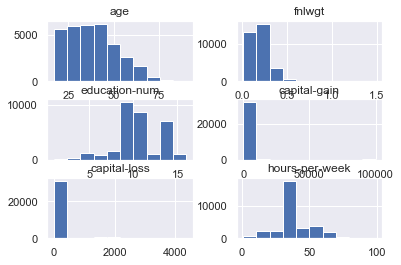

In [32]:
df_census.hist()

We increase the image size with the `figsize` parameter,
and suppress the unwanted textual output before the images with an appended `;`.

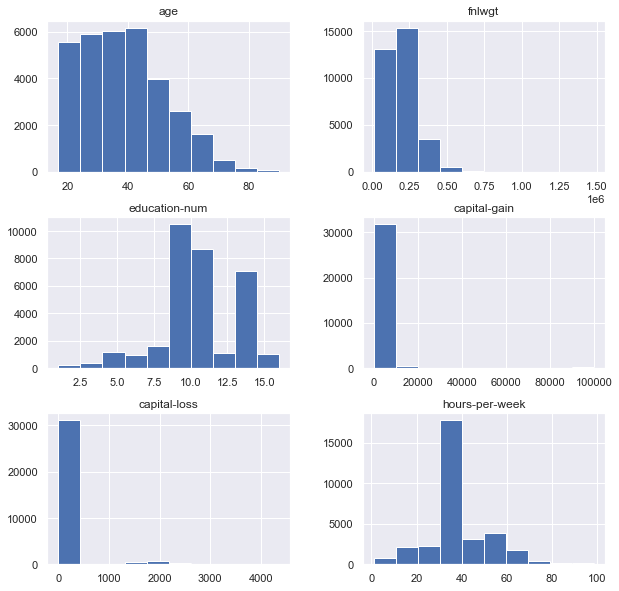

In [33]:
df_census.hist(figsize=(10, 10));

Create a histogram on one column.

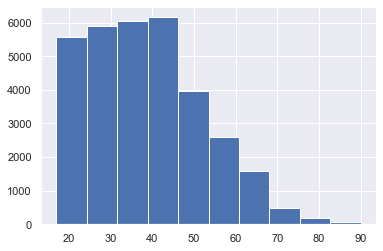

In [34]:
df_census[Col.age].hist();

We can also use the more general `plot` function.

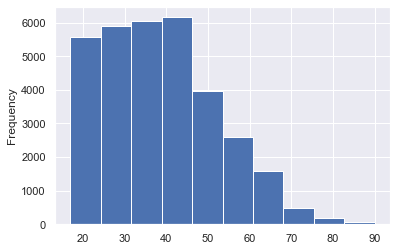

In [35]:
df_census[Col.age].plot(kind='hist');

Now, we count the different values in the education column, and create a bar chart for them.

In [36]:
df_census[Col.education].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

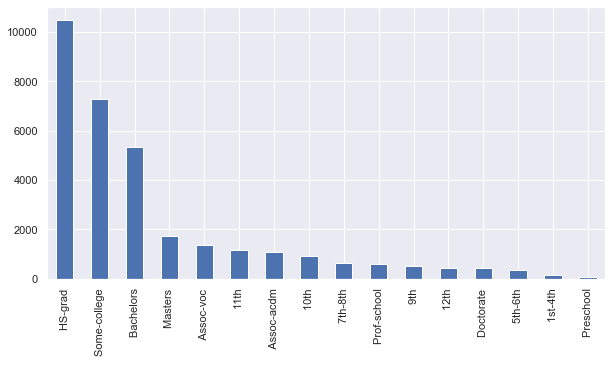

In [37]:
df_census[Col.education].value_counts().plot(kind='bar', figsize=(10, 5));

Here, a pie chart for the `workclass` column.

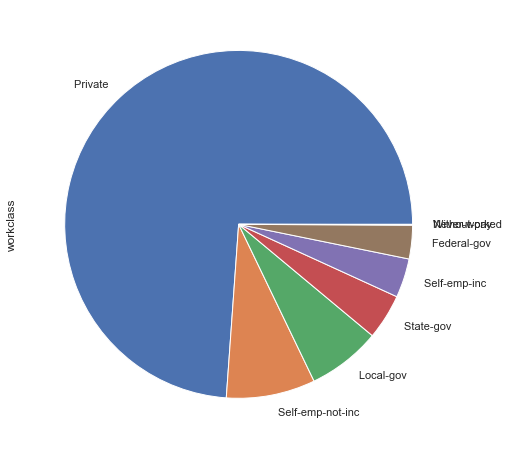

In [38]:
df_census[Col.workclass].value_counts().plot(kind='pie', figsize=(8, 8));

The `scatter_matrix` creates a matrix of scatter plots for numerical variables.
This can help to identify relationships between numerical variables at a first glance.

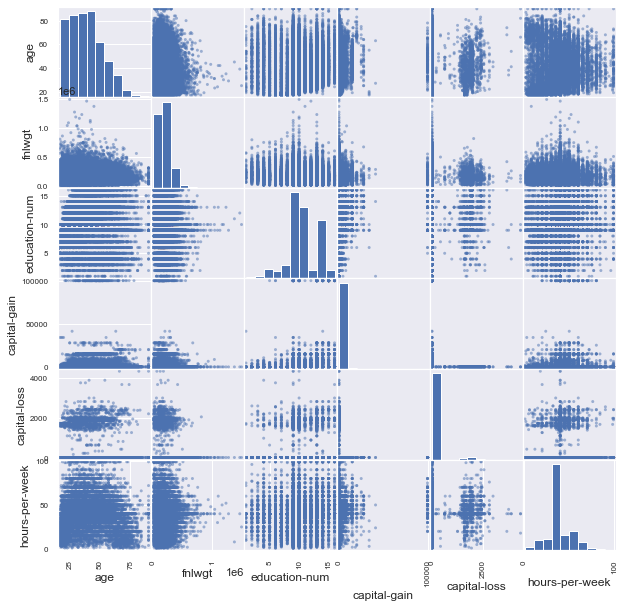

In [39]:
pd.plotting.scatter_matrix(df_census, figsize=(10, 10));

We can create a scatter plot for specific variables.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


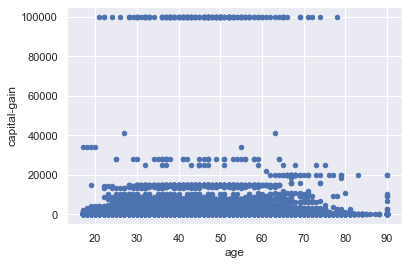

In [40]:
df_census.plot(kind='scatter', x=Col.age, y=Col.capital_gain);

The box plot is a way to show the value distribution quartiles.

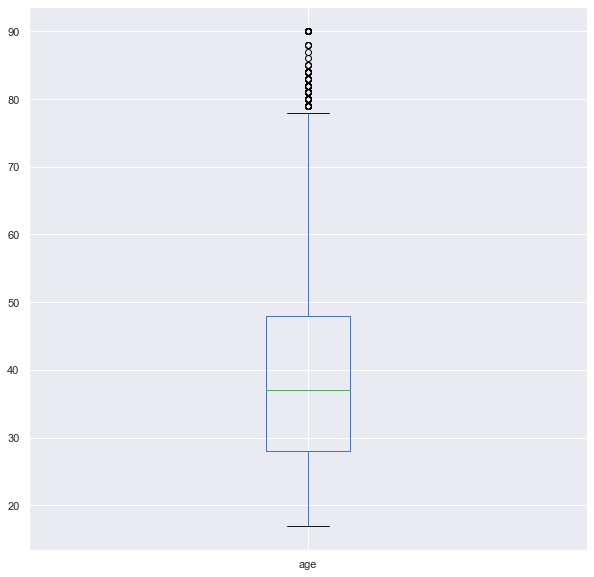

In [41]:
df_census[Col.age].plot(kind='box', figsize=(10, 10));

### Exploring the power plant data set

With start with a scatter matrix.

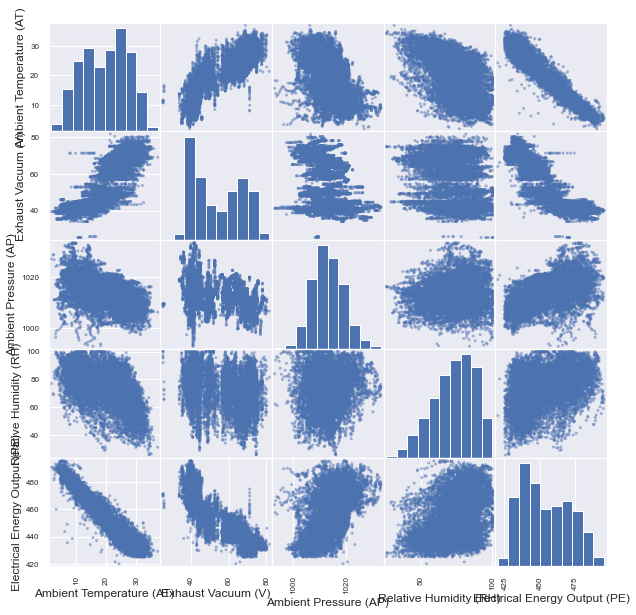

In [42]:
pd.plotting.scatter_matrix(df_powerplant, figsize=(10, 10));

The power plant data set shows some clear relationships between variables.
For example, the electrical output decreases with temperature.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


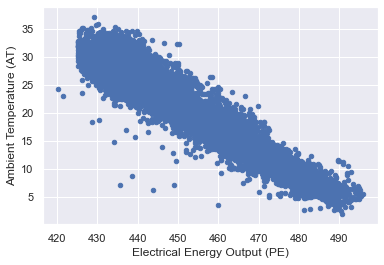

In [43]:
df_powerplant.plot(kind='scatter', x=ColPowerPlant.el_output, y=ColPowerPlant.abm_t)

The humidity shows a left-skewed distribution.

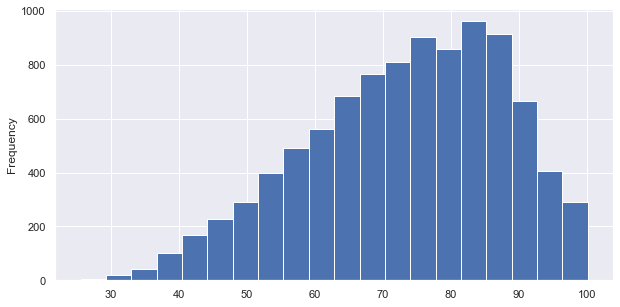

In [44]:
df_powerplant[ColPowerPlant.rel_humid].plot(kind='hist', bins=20, figsize=(10, 5));

We use box plots to look for outliers.

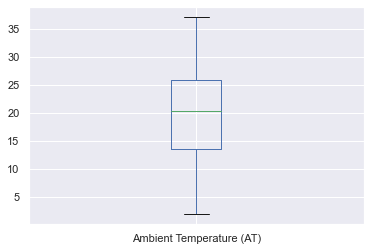

In [45]:
df_powerplant[ColPowerPlant.abm_t].plot(kind='box');

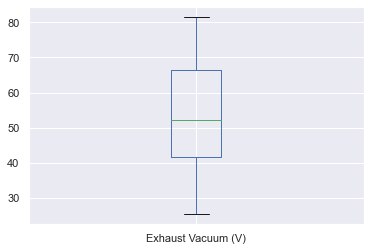

In [46]:
df_powerplant[ColPowerPlant.ex_vac].plot(kind='box');

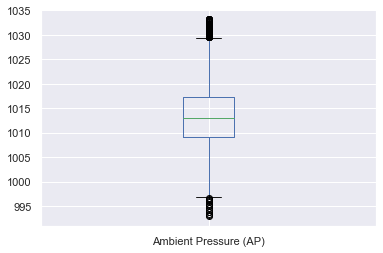

In [47]:
df_powerplant[ColPowerPlant.amb_p].plot(kind='box');

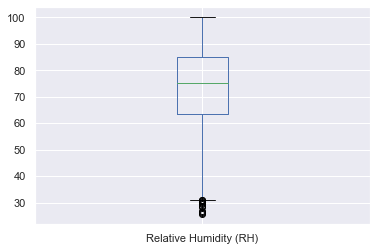

In [48]:
df_powerplant[ColPowerPlant.rel_humid].plot(kind='box');

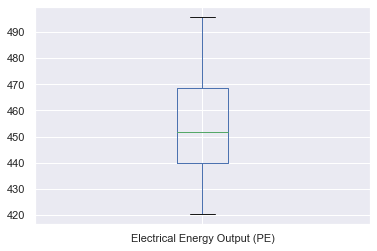

In [49]:
df_powerplant[ColPowerPlant.el_output].plot(kind='box');

The `Ambient Pressure` shows many outliers both in the lower and the upper value ranges,
while the `Relative Humidity` shows some outliers in the lower value range,
and other values show no outliers.

<a id='drawing-conclusions-store-data'></a>

## Drawing conclusions

We analyze sales data by week in different stores.

In [50]:
df_store = pd.read_csv('../resources/lesson3/store_data.csv')
df_store.head()

,week,storeA,storeB,storeC,storeD,storeE
0,2014-05-04,2643,8257,3893,6231,1294
1,2014-05-11,6444,5736,5634,7092,2907
2,2014-05-18,9646,2552,4253,5447,4736
3,2014-05-25,5960,10740,8264,6063,949
4,2014-06-01,7412,7374,3208,3985,3023


In [51]:
class ColStore:
    """ Column names for the store data set. """
    week = "week"
    storeA = "storeA"
    storeB = "storeB"
    storeC = "storeC"
    storeD = "storeD"
    storeE = "storeE"

In [52]:
df_store.shape

(200, 6)

In [53]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   week    200 non-null    object
 1   storeA  200 non-null    int64 
 2   storeB  200 non-null    int64 
 3   storeC  200 non-null    int64 
 4   storeD  200 non-null    int64 
 5   storeE  200 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


In [54]:
df_store.describe()

,storeA,storeB,storeC,storeD,storeE
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,5865.480000,6756.710000,4942.105000,5431.405000,2580.025000
std,2958.230318,3601.339489,1325.407768,1183.111323,1725.651381
min,137.000000,14.000000,927.000000,2276.000000,39.000000
25%,3812.250000,3884.500000,4053.500000,4717.000000,1235.000000
50%,5713.500000,6771.000000,4962.500000,5382.000000,2522.000000
75%,7662.250000,9350.500000,5801.750000,6243.750000,3574.250000
max,14403.000000,15841.000000,8293.000000,8190.000000,7553.000000


First, convert the `week` column from string to timestamp.

In [55]:
df_store[ColStore.week] = pd.to_datetime(df_store[ColStore.week])
df_store[ColStore.week]

0     2014-05-04
1     2014-05-11
2     2014-05-18
3     2014-05-25
4     2014-06-01
         ...    
195   2018-01-28
196   2018-02-04
197   2018-02-11
198   2018-02-18
199   2018-02-25
Name: week, Length: 200, dtype: datetime64[ns]

Set the `week` column as index.

In [56]:
df_store.set_index(ColStore.week, inplace=True)
df_store

,storeA,storeB,storeC,storeD,storeE
week,,,,,
2014-05-04,2643,8257,3893,6231,1294
2014-05-11,6444,5736,5634,7092,2907
2014-05-18,9646,2552,4253,5447,4736
2014-05-25,5960,10740,8264,6063,949
2014-06-01,7412,7374,3208,3985,3023
...,...,...,...,...,...
2018-01-28,282,6351,7759,5558,1028
2018-02-04,4853,6503,4187,5956,1458
2018-02-11,9202,3677,4540,6186,243


Histogram for each store.

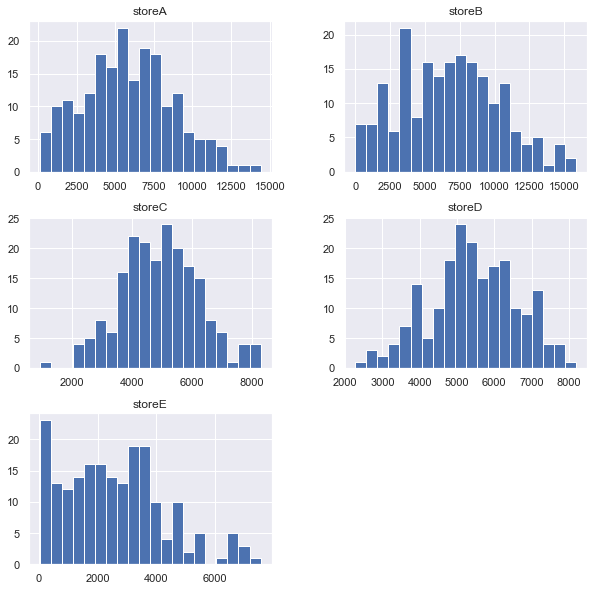

In [57]:
df_store.hist(bins=20, figsize=(10, 10));

A histogram for total sales of all stores.

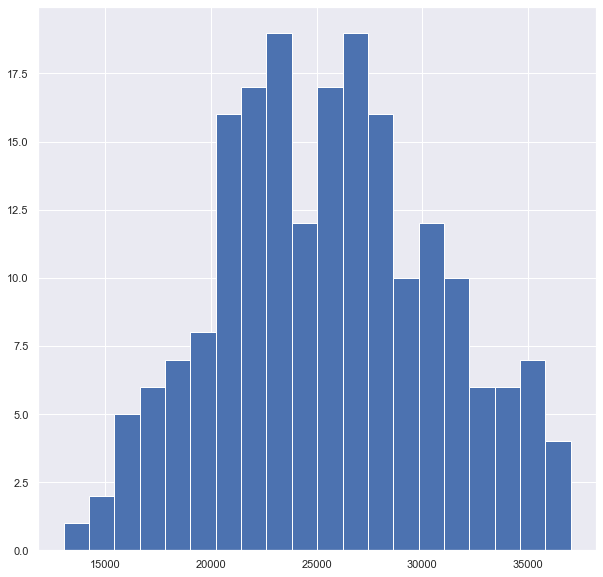

In [58]:
df_store.transpose().sum().hist(bins=20, figsize=(10, 10));

#### Which store has the highest total sales for the final month of data

In [59]:
import datetime as dt

date_max_week = df_store.index.max()
date_last_month = dt.datetime(year=date_max_week.year, month=date_max_week.month, day=1)
date_last_month

datetime.datetime(2018, 2, 1, 0, 0)

Now, consider only data in the last month.

In [60]:
df_store_last_month = df_store.loc[date_last_month:]
df_store_last_month

,storeA,storeB,storeC,storeD,storeE
week,,,,,
2018-02-04,4853,6503,4187,5956,1458
2018-02-11,9202,3677,4540,6186,243
2018-02-18,3512,7511,4151,5596,3501
2018-02-25,7560,6904,3569,5045,2585


In [61]:
df_store_last_month_sum = df_store_last_month.sum()

print(f"In {date_last_month.strftime('%b %Y')}, "
      f"{df_store_last_month_sum.idxmax()} has the highest total sales, "
      f"amounting to {df_store_last_month_sum.max()}." )

In Feb 2018, storeA has the highest total sales, amounting to 25127.


#### Which store has the highest average sales

In [62]:
df_store_mean = df_store.mean()
df_store_mean

storeA    5865.480
storeB    6756.710
storeC    4942.105
storeD    5431.405
storeE    2580.025
dtype: float64

In [63]:
print(f"{df_store_mean.idxmax()} has the highest average sales, amounting to {df_store_mean.max()}." )

storeB has the highest average sales, amounting to 6756.71.


#### Which store has the most sales during the week of 2016-03-13

In [64]:
day_2016_03_13 = dt.datetime(year=2016, month=3, day=13)
df_store_week_of_2016_03_13 = df_store.loc[day_2016_03_13]
df_store_week_of_2016_03_13

storeA    2054
storeB    1390
storeC    5112
storeD    5513
storeE    2536
Name: 2016-03-13 00:00:00, dtype: int64

In [65]:
print(f"{df_store_week_of_2016_03_13.idxmax()} has the most sales "
      f"during the week of {day_2016_03_13.strftime('%Y-%m-%d')}, "
      f"amounting to {df_store_week_of_2016_03_13.max()}." )

storeD has the most sales during the week of 2016-03-13, amounting to 5513.


#### What is the week with the lowest sales for `storeC`

In [66]:
df_store_C = df_store.loc[:, ColStore.storeC]
df_store_C_week_with_lowest_sales = df_store_C.idxmin()

print(f"{df_store_C_week_with_lowest_sales.strftime('%Y-%m-%d')} was the week with the lowest sales for storeC, "
      f"amounting to {df_store_C[df_store_C_week_with_lowest_sales]}." )

2014-07-06 was the week with the lowest sales for storeC, amounting to 927.


#### Which store has the most sales in the latest 3-month period

In [67]:
date_start_of_3_months_period = date_last_month - pd.DateOffset(months=2)
date_start_of_3_months_period

Timestamp('2017-12-01 00:00:00')

In [68]:
df_store_last_3_months_period = df_store.loc[date_start_of_3_months_period:]
df_store_last_3_months_period

,storeA,storeB,storeC,storeD,storeE
week,,,,,
2017-12-03,5179,3850,6121,6778,113
2017-12-10,9348,5624,5446,5448,227
2017-12-17,5310,8647,5680,7049,3578
2017-12-24,8976,9503,6240,3882,2890
2017-12-31,11875,1527,6711,5265,1701
2018-01-07,8978,11312,4158,5019,3842
2018-01-14,6963,4014,4215,7153,3097
2018-01-21,5553,3971,3761,6255,3071
2018-01-28,282,6351,7759,5558,1028


In [69]:
df_store_last_3_months_period_sum = df_store_last_3_months_period.sum()
df_store_last_3_months_period_sum

storeA    87591
storeB    79394
storeC    66538
storeD    75190
storeE    27334
dtype: int64

In [70]:
print(f"{df_store_last_3_months_period_sum.idxmax()} has the most sales "
      f"in the 3-month period starting at {date_start_of_3_months_period.strftime('%Y-%m-%d')}, "
      f"amounting to {df_store_last_3_months_period_sum.max()}." )

storeA has the most sales in the 3-month period starting at 2017-12-01, amounting to 87591.


## Communicating results using visualizations

We use charts to answer some of the questions from the [previous section](#drawing-conclusions-store-data).

#### Which store has the highest total sales for the final month of data

In [71]:
def bar_chart_sorted(data, title = ""):
    data.sort_values(ascending=False).plot(kind='bar', title=title);

def pie_chart_sorted(data, title = "", label=""):
    data.sort_values(ascending=False).plot(kind='pie', title=title, label=label, autopct='%1.1f%%');

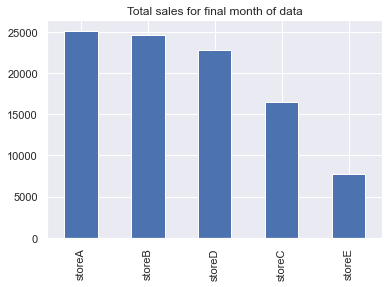

In [72]:
title='Total sales for final month of data'
bar_chart_sorted(df_store_last_month_sum, title=title);

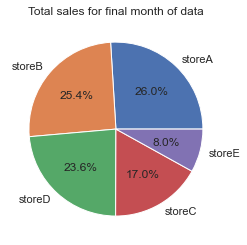

In [73]:
pie_chart_sorted(df_store_last_month_sum, title=title);

#### Which store has the highest average sales

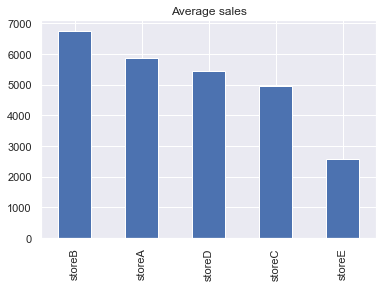

In [74]:
title='Average sales'
bar_chart_sorted(df_store_mean, title=title);

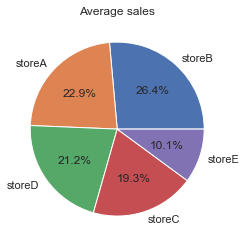

In [75]:
pie_chart_sorted(df_store_mean, title=title);

#### Which store has the most sales during the week of 2016-03-13

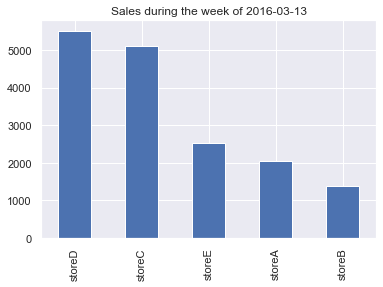

In [76]:
title='Sales during the week of 2016-03-13'
bar_chart_sorted(df_store_week_of_2016_03_13, title=title);

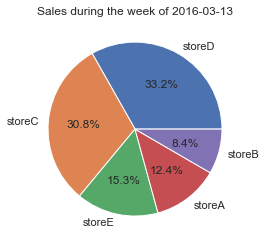

In [77]:
pie_chart_sorted(df_store_week_of_2016_03_13, title=title);

#### Which store has the most sales in the latest 3-month period

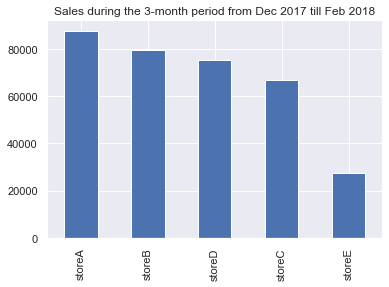

In [78]:
title=f"Sales during the 3-month period from {date_start_of_3_months_period.strftime('%b %Y')} " \
      f"till {date_last_month.strftime('%b %Y')}"
bar_chart_sorted(df_store_last_3_months_period_sum, title=title);

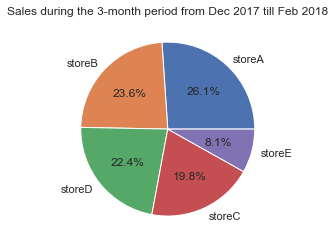

In [79]:
pie_chart_sorted(df_store_last_3_months_period_sum, title=title);
